# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Brian Aji Pamungkas]
- **Email:** [brianajiks123@gmail.com]
- **ID Dicoding:** [brianajiks123]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?
- Pada musim apa penyewaan sepeda meningkat dan menurun?
- Faktor apa yang paling mempengaruhi penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
days_df = pd.read_csv("data/day.csv")
days_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Kedua dataset sudah dinormalisasi.
- File hour.csv berisi detail penyewaan sepeda per jam.
- File day.csv berisi data penyewaan sepeda per hari.

### Assessing Data

In [4]:
hours_df.info()
print("")
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [5]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [8]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hours_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [11]:
days_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

**Insight:**
- Kedua dataset tidak memiliki missing value dan duplikasi data namun perlu memperbaiki tipe dari kolom dteday.
- Dataset hour berisi 17379 data jam.
- Dataset day berisi 731 data hari.

### Cleaning Data

In [12]:
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"])
days_df["dteday"] = pd.to_datetime(days_df["dteday"])

hours_df.info()
print("")
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [13]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Tipe data pada kolom dteday sudah sesuai.

## Exploratory Data Analysis (EDA)

### Menggabungkan data

In [15]:
merged_df = pd.merge(hours_df, days_df.drop(columns=[
    'instant', 'yr', 'mnth', 'holiday', 'weekday',
    'workingday', 'weathersit', 'temp', 'atemp',
    'hum', 'windspeed', 'casual', 'registered', 'cnt']),
                     on='dteday', how='left')

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season_x    17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [17]:
merged_df.describe()

,instant,dteday,season_x,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2.501640
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,3.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,3.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,4.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1.106918


In [18]:
merged_df.sample(5)

,instant,dteday,season_x,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_y
342,343,2011-01-15,1,0,1,18,0,6,0,2,0.30,0.2879,0.45,0.2537,15,69,84,1
9369,9370,2012-01-31,1,1,1,7,0,2,1,1,0.26,0.2576,0.60,0.1940,6,273,279,1
7542,7543,2011-11-15,4,0,11,21,0,2,1,2,0.50,0.4848,0.77,0.0896,23,145,168,4
1686,1687,2011-03-15,1,0,3,21,0,2,1,3,0.32,0.3333,0.81,0.1045,2,53,55,1
14449,14450,2012-08-30,3,1,8,6,0,4,1,1,0.60,0.5606,0.83,0.1642,8,155,163,3


In [19]:
merged_df.to_csv("merge_data.csv", index=False)

### Explore Data per Month

In [20]:
monthly_rentals = merged_df.groupby(merged_df['dteday'].dt.to_period("M")).agg({'cnt': 'sum'}).reset_index()
monthly_rentals['dteday'] = monthly_rentals['dteday'].astype(str)

In [21]:
monthly_rentals.head()

,dteday,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


In [22]:
monthly_rentals.describe()

,cnt
count,24.000000
mean,137194.958333
std,52267.138331
min,38189.000000
25%,100811.250000
50%,136256.000000
75%,179634.250000
max,218573.000000


**Insight:**
- Penyewaan terbesar untuk setiap bulan sebanyak 218573 penyewaan.
- Penyewaan terkecil untuk setiap bulan sebanyak 38189 penyewaan.

### Explore Data per Season

In [23]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
merged_df['season_name'] = merged_df['season_x'].map(season_mapping)

seasonal_rentals = merged_df.groupby('season_name').agg({'cnt': 'sum'}).reset_index()
season_order = ["Spring", "Summer", "Fall", "Winter"]
seasonal_rentals['season_name'] = pd.Categorical(seasonal_rentals['season_name'], categories=season_order, ordered=True)
seasonal_rentals = seasonal_rentals.sort_values('season_name')

In [24]:
seasonal_rentals.head()

,season_name,cnt
1,Spring,471348
2,Summer,918589
0,Fall,1061129
3,Winter,841613


In [25]:
seasonal_rentals.describe()

,cnt
count,4.000000e+00
mean,8.231698e+05
std,2.515606e+05
min,4.713480e+05
25%,7.490468e+05
50%,8.801010e+05
75%,9.542240e+05
max,1.061129e+06


**Insight:**
- Penyewaan terbesar terjadi pada musim Fall sebanyak 1061129 penyewaan.
- Penyewaan terkecil terjadi pada musim Spring sebanyak 471348 penyewaan.

### Explore Correlation

In [26]:
correlation_matrix = merged_df[['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'weekday', 'workingday', 'weathersit']].corr()

print(correlation_matrix['cnt'].drop('cnt').sort_values(ascending=False))

temp          0.404772
atemp         0.400929
windspeed     0.093234
workingday    0.030284
weekday       0.026900
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


**Insight:**
- Temperature memiliki korelasi terbesar dengan jumlah penyewaan 0.404772, berarti semakin bagus cuaca maka semakin banyak sepeda yang disewa.
- Humidity dan Weathersit memiliki korelasi negatif, berarti cuaca buruk dapat mengurangi/menghambat jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

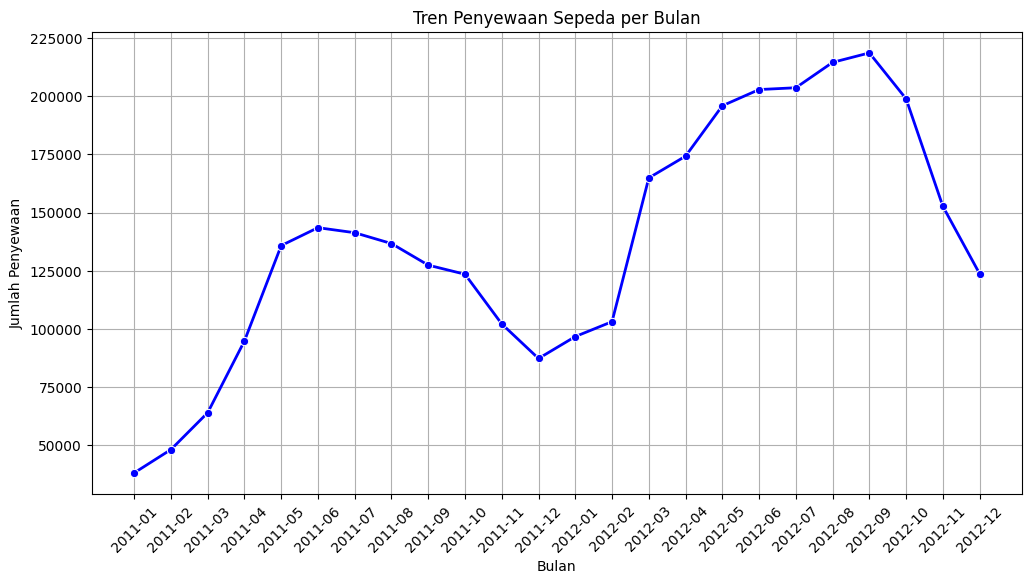

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_rentals, x='dteday', y='cnt', marker='o', color='b', linewidth=2)
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.grid(True)
plt.show()

**Insight:**
- Jumlah penyewaan sepeda meningkat drastis dari awal tahun sampai pertengahan tahun (Spring-Fall) dengan titik puncak pada bulan September 2012.
- Mengalami penurunan signifikan saat menjelang akhir tahun atau musim dingin (Winter).

### Pertanyaan 2:

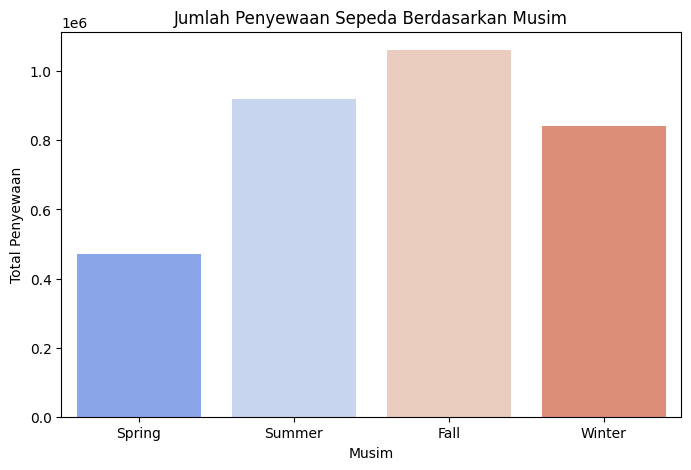

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_rentals, x='season_name', y='cnt', palette='coolwarm', hue='season_name', legend=False)
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight:**
- Peningkatan penyewaan dimulai pada musim panas (Summer) sampai titik puncak pada musim gugur (Fall).
- Penurunan saat musim dingin (Winter).

### Pertanyaan 3:

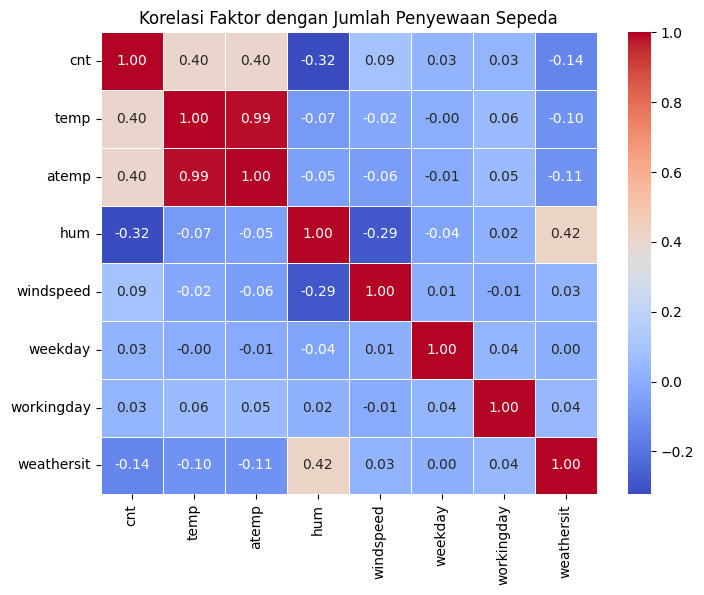

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Faktor dengan Jumlah Penyewaan Sepeda")
plt.show()

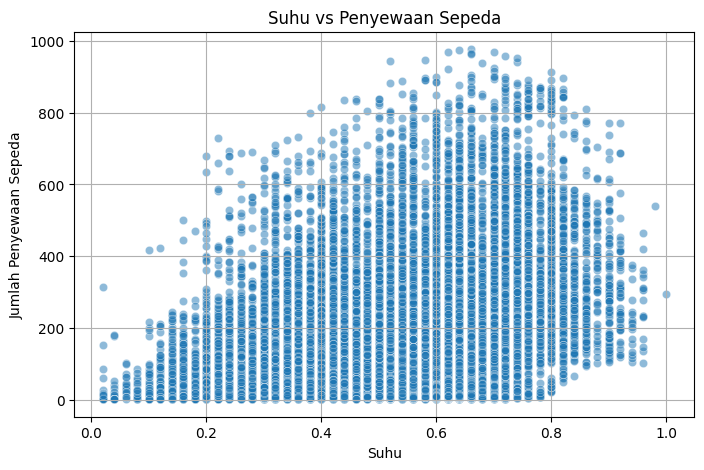

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['temp'], y=merged_df['cnt'], alpha=0.5)
plt.title("Suhu vs Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid()
plt.show()

**Insight:**
- Faktor cuaca seperti temperatur, kelembaban, kecepatan angin, dan kondisi cuaca berperan penting dalam menentukan jumlah penyewaan sepeda. Semakin hangat suhu udara, semakin tinggi jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional)

## Manual Grouping

### Group by hour of the day
### Pengaruh waktu terhadap  penyewaan sepeda

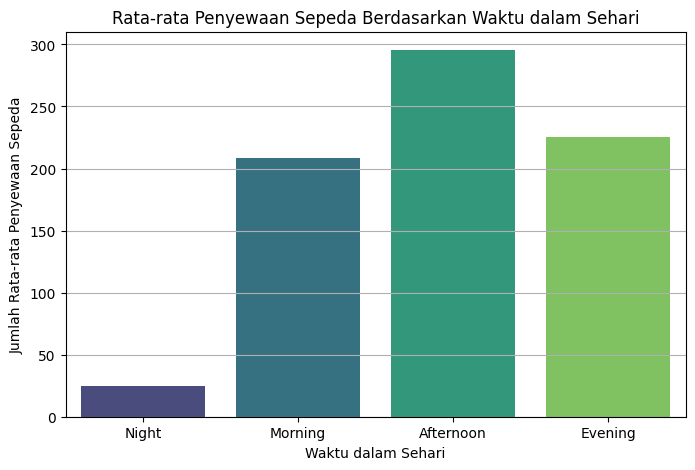

In [31]:
merged_df['time_of_day'] = pd.cut(merged_df['hr'], bins=[0, 6, 12, 18, 24], 
                                  labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False, ordered=False)
time_trend = merged_df.groupby('time_of_day', observed=False)['cnt'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=time_trend.index, y=time_trend.values, palette="viridis", hue=time_trend.index, legend=False)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari")
plt.xlabel("Waktu dalam Sehari")
plt.ylabel("Jumlah Rata-rata Penyewaan Sepeda")
plt.grid(axis='y')
plt.show()

**Insight:**
- Puncak penyewaan sepeda terjadi pada sore hari (Afternoon). Kemungkinan besar terjadi karena jam pulang kerja/sekolah, dimana banyak orang menggunakan sepeda untuk perjalanan pulang.
- Penurunan penyewaan sepeda terjadi pada malam hari (Night). Kemungkinan disebabkan oleh faktor keamanan, berkurangnya aktivitas luar ruangan, serta kondisi pencahayaan yang kurang mendukung untuk bersepeda.

### Group by weather situation
### Pengaruh kondisi cuaca terhadap penyewaan sepeda

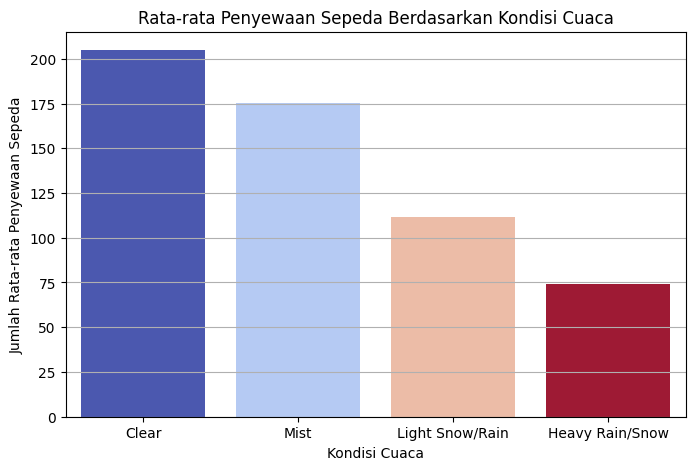

In [32]:
weather_trend = merged_df.groupby("weathersit")["cnt"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_trend.index, y=weather_trend.values, palette="coolwarm", hue=weather_trend.index, legend=False)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Snow/Rain", "Heavy Rain/Snow"])
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Rata-rata Penyewaan Sepeda")
plt.grid(axis='y')
plt.show()

**Insight:**
- Puncak penyewaan sepeda terjadi ketika cuaca cerah (Clear).
- Penurunan penyewaan sepeda terjadi ketika cuaca buruk: hujan/bersalju (Heavy Rain/Snow).

### Group by temperature category
### Pengaruh kategori suhu terhadap penyewaan sepeda

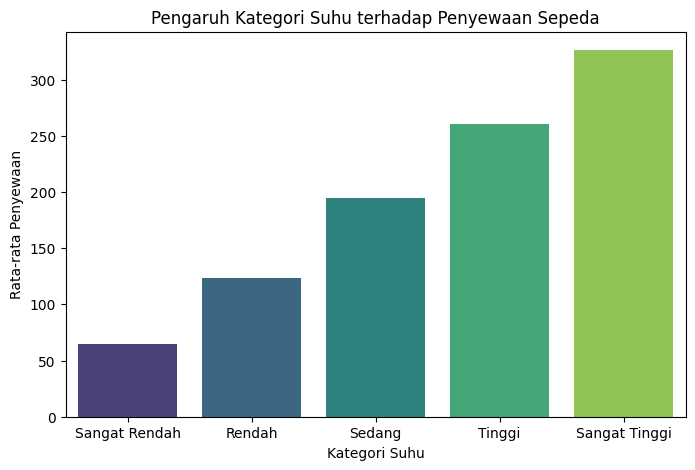

In [33]:
# Mengelompokkan suhu ke dalam kategori tertentu
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
merged_df['temp_category'] = pd.cut(merged_df['temp'], bins=bins, labels=labels)

grouped_temp = merged_df.groupby('temp_category', observed=False).agg({'cnt': 'mean'}).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_temp, x='temp_category', y='cnt', palette='viridis', hue='temp_category')
plt.xlabel("Kategori Suhu")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Pengaruh Kategori Suhu terhadap Penyewaan Sepeda")
plt.show()

## Conclusion

- Dari analisis tren bulanan, terlihat bahwa jumlah penyewaan sepeda mengalami peningkatan sepanjang tahun, dimana terdapat pola yang sama yaitu dimulai dari awal tahun (Spring) terus meningkat sampai titik puncak di musim gugur (Fall) dan mulai mengalami penurunan saat menjelang akhir tahun atau musim dingin (Winter).
- Dari analisis musim, penyewaan sepeda meningkat pada musim panas (Summer) sampai musim gugur (Fall) dan menurun pada musim dingin (Winter).
- Dari analisis korelasi, suhu (temperature) menunjukkan korelasi positif tertinggi. Jadi, semakin tinggi suhu maka semakin banyak pengguna menyewa sepeda.
- Dari hasil manual grouping, menunjukkan bahwa kondisi cuaca dan waktu juga berpengaruh pada peningkatan jumlah penyewaan sepeda. Banyak penyewa sepeda pada kondisi cuaca bagus dan di waktu sore hari.